In [ ]:
import keras
import shutil
import os
import cv2 as cv                                                        # The cv2.imshow() method is used to display an image in a window that automatically adjusts to the image size.
import numpy as np                                                      # Mathematical operations on arrays.
import pandas as pd                                                     # Easy-to-use data structures and open-source data analysis tools.
import matplotlib.pyplot as plt                                         # Library for plotting graphs, similar to MATLAB.
import seaborn as sns                                                   # Uses Matplotlib for plotting graphs.
from pathlib import Path                                                # Function for working with files and directories.
from sklearn.model_selection import train_test_split                    # Used for splitting the dataset into training and testing sets.
from keras.models import Sequential                                     # Allows creating neural network models layer by layer in a step-by-step fashion.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout     # Allows creating layers that are fundamental building blocks of neural networks in Keras.
import tensorflow as tf                                                 # Neural network library for working with neural networks.
from sklearn.metrics import confusion_matrix, classification_report     # Model evaluation metrics: confusion matrix and classification report.
from tensorflow.keras import datasets, layers, models                   # Datasets, layers, and pretrained models.


In [ ]:
from keras.preprocessing.image import img_to_array                      # Converts an image instance to a numpy array.
from matplotlib import pyplot                                           # Simplifies the use of Matplotlib for plotting graphs.
from numpy import expand_dims                                           # Adds a new axis to the array.
from keras.preprocessing.image import ImageDataGenerator                # Generates new images for data augmentation.


In [ ]:
!wget https://www.dropbox.com/scl/fi/zmaqgi3vcjf1batyzoqia/archive_3.zip?rlkey=dyws5s9ix985dc6erenryno7t&dl=0
!ls

--2023-11-15 18:30:35--  https://www.dropbox.com/scl/fi/zmaqgi3vcjf1batyzoqia/archive_3.zip?rlkey=dyws5s9ix985dc6erenryno7t
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc152ddf7b185ff791cc3b53f9c.dl.dropboxusercontent.com/cd/0/inline/CHlPy3_NS2PDwqjJ2c7n7K0VcR7oQ0N4XxGR7b5Dah09oIQM4tfMJl2_HgbdNah13fGshLEie0R9HgCqXIO4B5Wt5yi3VRXryD6Y_SH-8YJpbriWadMuoOZtv_BWheraDOzzLKRXNtAAdhQ-YY8euN_V/file# [following]
--2023-11-15 18:30:36--  https://ucc152ddf7b185ff791cc3b53f9c.dl.dropboxusercontent.com/cd/0/inline/CHlPy3_NS2PDwqjJ2c7n7K0VcR7oQ0N4XxGR7b5Dah09oIQM4tfMJl2_HgbdNah13fGshLEie0R9HgCqXIO4B5Wt5yi3VRXryD6Y_SH-8YJpbriWadMuoOZtv_BWheraDOzzLKRXNtAAdhQ-YY8euN_V/file
Resolving ucc152ddf7b185ff791cc3b53f9c.dl.dropboxusercontent.com (ucc152ddf7b185ff791cc3b53f9c.dl.dropboxusercontent.com)... 162.125.1.15, 2620:

In [ ]:
!unzip -q archive_3.zip?rlkey=dyws5s9ix985dc6erenryno7t

In [ ]:
import os

# List the files in the 'Positive/' directory
positive_dir = os.listdir('Positive/')
print("Images with road surface defects: ", len(positive_dir))

# List the files in the 'Negative/' directory
negative_dir = os.listdir('Negative/')
print("Images without road surface defects: ", len(negative_dir))


Images with road surface defects:  20000
Images without road surface defects:  20000


In [ ]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

The function generate_df is called, which takes image_dir and labels as arguments and returns a data table. It creates two series: file paths representing all images in the image_dir folder, and class labels that are either negative or positive depending on whether the image contains a defect. The function returns a DataFrame after merging the two DataFrames along axis=1.







In [ ]:
#Merges two dataframes - positive_df and negative_df with positive and negative class labels
positive_df = generate_df(Path('Positive/'), label="POSITIVE")
negative_df = generate_df(Path('Negative/'), label="NEGATIVE")

all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df


,Filepath,Label
0,Positive/07520.jpg,POSITIVE
1,Positive/19855.jpg,POSITIVE
2,Positive/08716.jpg,POSITIVE
3,Negative/12185.jpg,NEGATIVE
4,Positive/09692.jpg,POSITIVE
...,...,...
39995,Positive/11939_1.jpg,POSITIVE
39996,Negative/17427.jpg,NEGATIVE
39997,Positive/02806.jpg,POSITIVE
39998,Positive/16888_1.jpg,POSITIVE


In [ ]:

df1 = all_df
df1.head()

,Filepath,Label
0,Positive/07520.jpg,POSITIVE
1,Positive/19855.jpg,POSITIVE
2,Positive/08716.jpg,POSITIVE
3,Negative/12185.jpg,NEGATIVE
4,Positive/09692.jpg,POSITIVE


In [ ]:
df1.sample(10)

,Filepath,Label
38614,Positive/01745.jpg,POSITIVE
23995,Positive/06652.jpg,POSITIVE
5314,Positive/03407.jpg,POSITIVE
10039,Negative/01217.jpg,NEGATIVE
11011,Negative/16766.jpg,NEGATIVE
2907,Negative/01337.jpg,NEGATIVE
2269,Negative/14182.jpg,NEGATIVE
29279,Negative/13898.jpg,NEGATIVE
16709,Negative/14158.jpg,NEGATIVE
14232,Negative/14515.jpg,NEGATIVE


In [ ]:

df1.isnull().sum()

Filepath    0
Label       0
dtype: int64

In [ ]:
np.random.seed(0)
#The data is shuffled and split in a ratio of 80% to 20%.
train_df, test_df = train_test_split(df1,
    train_size=0.8,
    shuffle=True,
    random_state=1
)

In [ ]:
display(train_df.shape)
display(test_df.shape)

(32000, 2)

(8000, 2)

#Image Preprocessing and Augmentation
Data augmentation is a technique used to increase the volume of data by adding slightly modified copies of existing instances or newly generated synthetic data from the available data.

Variations include: cropping, flipping horizontally and vertically, shifting, rotating, scaling, and horizontal and vertical shearing.

#Advantages of Data Augmentation:
Improves model performance and generalization ability.
Requires much less effort in creating a dataset (a small dataset can be easily turned into a large one).
Reduces overfitting by increasing diversity.
Helps improve the accuracy of the model's predictions.
#Disadvantage of Data Augmentation:
Creating augmented images may require a significant amount of time.

In [ ]:
#Initializing generators for training and testing data
#The scaling parameter ensures the range of input data is in the interval [0, 1]
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.10,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1./255,
)

similar images consist of RGB coefficients in the range 0-255, but such values would be too high for the model to process (given the learning rate), so it is better to use target values between 0 and 1 rather than by scaling with division by 255.

Creating a generator with a mini-sample size of 64
Training sample


In [ ]:

# train_df contains the input classes
# here are Positive and Negative,
# so class_mode (the type of class labels returned) is categorical
# target size is the size of the input images, each image will be resized to this size
# shuffle: whether to shuffle the data. Defaults to True. If set to False, the data is sorted in alphanumeric order.
# batch_size: The size of the mini-sample of data. Default: 32.
# Color mode: RGB
# The mini-sample size determines the number of instances that will be distributed across the network at each training epoch




train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (120, 120),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 64,
    shuffle = True,
    seed = 42,
    subset = 'training'
)

Found 28800 validated image filenames belonging to 2 classes.


In [ ]:
#You can obtain a dictionary that maps class labels to the index
# of the model's prediction vector, which serves as the output.
label_map1 = (train_data.class_indices)
label_map1

{'NEGATIVE': 0, 'POSITIVE': 1}

In [ ]:
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 3200 validated image filenames belonging to 2 classes.


In [ ]:
label_map2 = (val_data.class_indices)
label_map2

{'NEGATIVE': 0, 'POSITIVE': 1}

<Figure size 1000x1000 with 0 Axes>

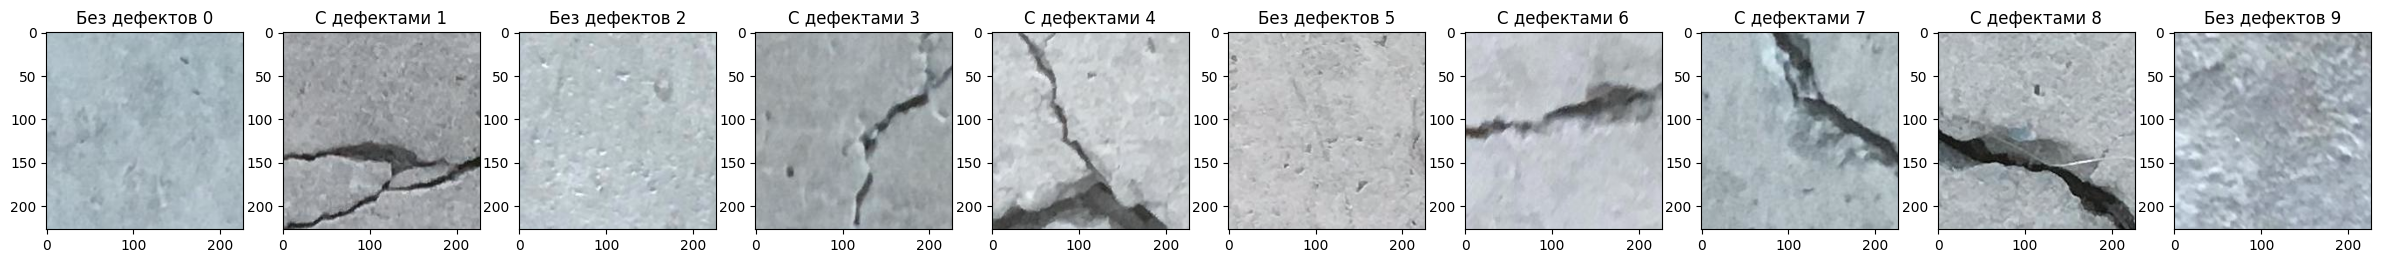

In [ ]:
plt.figure(figsize = (10,10))
fig, a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(train_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if train_df.iloc[i]['Label'] == 'POSITIVE':
        title = "With defects " + str(i)
    else:
        title = "Without defects " + str(i)
    a[i].set_title(title)

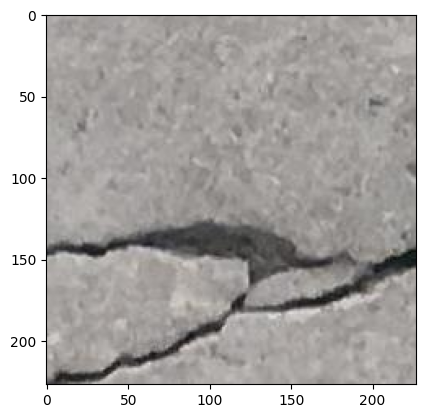

In [ ]:
from keras.preprocessing.image import load_img
img = load_img(train_df.iloc[1]['Filepath'])
plt.imshow(img)

#Random Rotation

The image rotation technique allows the model to create images with different orientations. The ImageDataGenerator class in Keras uses this technique to generate randomly rotated images.

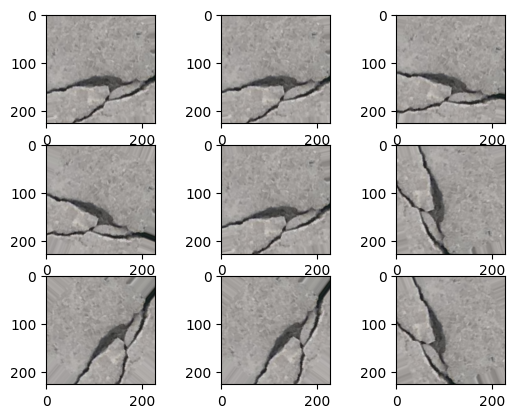

In [ ]:
# Convert the image to an array for further processing
data = img_to_array(img)

# Increase the dimension of data by 1 sample and store it in samples
samples = expand_dims(data, 0)

# Call ImageDataGenerator for image augmentation with a rotation range of 90 degrees
datagen = ImageDataGenerator(rotation_range=90)

# Create an iterator for the generator
it = datagen.flow(samples, batch_size=1)

# In a loop (9 iterations):
for i in range(9):
    # Create a 3 x 3 plot
    pyplot.subplot(330 + 1 + i)

    # Generate an augmented image
    batch = it.next()

    # Save in unsigned integer array for viewing
    image = batch[0].astype('uint8')

    # Add to the plot
    pyplot.imshow(image)

# Display the plot
pyplot.show()


#Random Shifts

The technique of random shifts helps improve images that are not correctly centered. There might be scenarios where images are not in the center. The ImageDataGenerator uses the height_shift_range parameter for vertically shifting images, and for horizontally shifting images, you can use width_shift_range. Values are specified as percentages or integers.







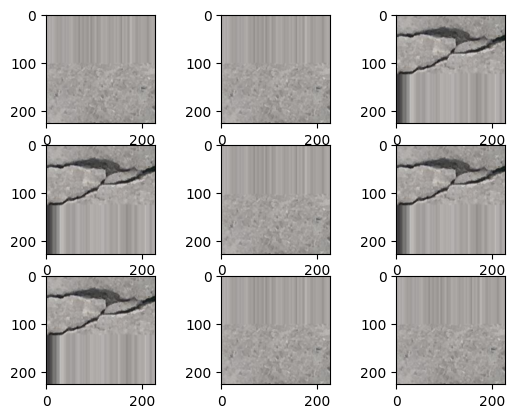

In [ ]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-100,100]) # генератор с определением диапазона общей ширины сдвига [-100, +100]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()


Random Vertical Shift

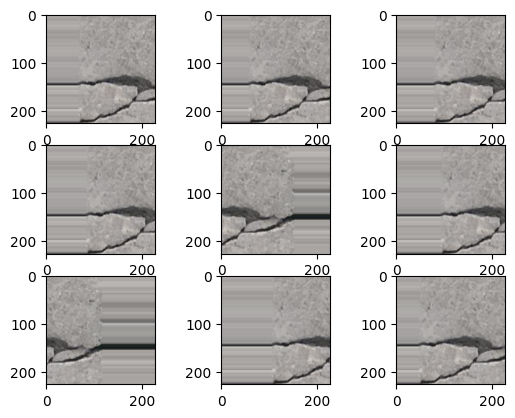

In [ ]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()


#Vertical Flips
The vertical_flip argument is used.

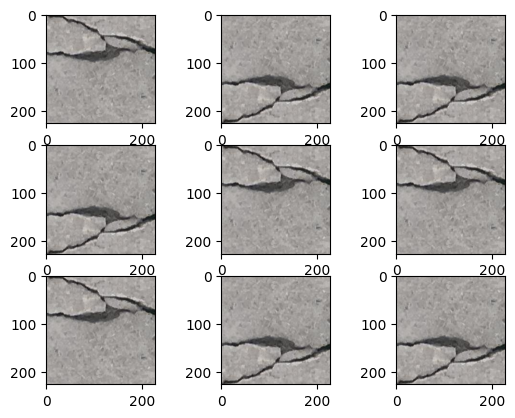

In [ ]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

#Random Brightness

The fourth type of augmentation is changing the brightness of images. This is the most useful method since many images often have low or almost zero brightness. Therefore, you can train the model on images generated using the existing ones. To control the brightness of images using ImageDataGenerator, there is an argument called brightness_range. For this parameter, negative values will darken the images, while positive values will make the images brighter.

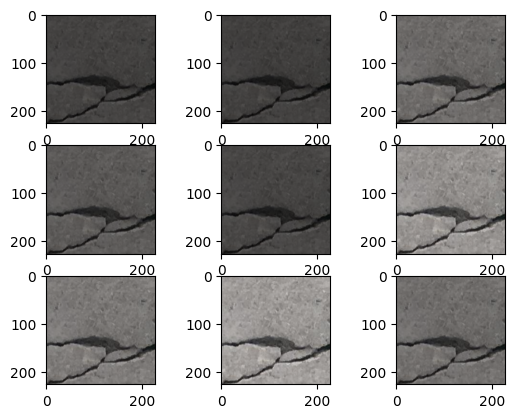

In [ ]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0]) # диапазон изменения яркости - [0,2...1,0]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

#Random Zoom

To increase the scale, values less than 1 should be used, and for reduction, values greater than 1. This scaling operation is implemented using the zoom_range argument.

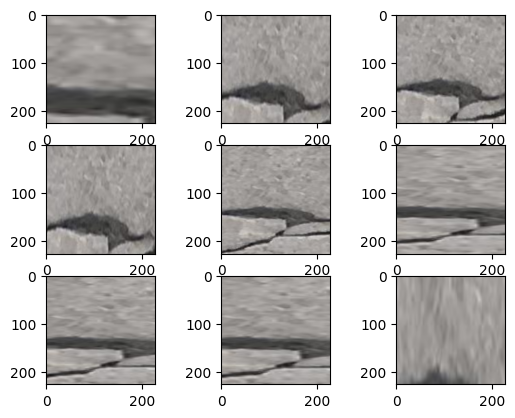

In [ ]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.1,1.0]) # изменение размеров изображения – от 0,1 до 1,0 от исходного
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

#Creating a CNN Model
CNN consists of several layers of neurons, primarily including convolutional layers and pooling layers. The convolutional layer contains a set of filters whose parameters need to be learned by the neural network. The size of the filters is smaller than the dimensionality of the input data. Each filter performs a convolution operation on the input layer to compute a feature map.

#Creating Convolutional Layers
The Sequential model allows you to create models layer by layer in a step-by-step fashion.

For CNN, the input data is tensors in the form "image height, image width, color channels."

Color model – RGB.

Dimensionality – (120, 120, 3), where image_height is 120, image_width is 120, and color channels are 3.

The activation function acts as the "gate" between the input feeding the current neuron and its output going to the next layer. It decides whether the neuron should be activated or not.

The ReLU activation function is widely used and is the default choice as it tends to provide better results. ReLU is prevalent because it is simple to implement and efficient in overcoming limitations of previously popular activation functions (the vanishing gradient problem). It is less susceptible to vanishing gradients that hinder the training of deep models – as more layers using certain activation functions are added to neural networks, the gradients of the loss function approach zero, making it difficult to train the network.

#Conv2D Layer
Keras Conv2D is a 2D convolutional layer that creates a kernel for convolution with the input data to generate a new tensor (output). The mandatory parameter for Conv2D is the number of filters that will be trained by the convolutional layers. Other parameters include the kernel size and activation function.

#Pooling Layer
Pooling layers are used to reduce the dimensionality of the feature map, thus reducing the number of learnable parameters and the volume of computations performed in the network. Max pooling is an operation that selects the maximum element from the feature map region covered by the filter.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0

 The output of each Conv2D and MaxPooling2D layer is a three-dimensional tensor "height, width, channels." The width and height dimensions tend to decrease as the network becomes deeper. The number of output channels for each Conv2D layer is the first argument. Typically, as the width and height decrease, you can add more output channels to each Conv2D layer. This helps the network capture and learn more complex features as it progresses through the layers.

To complete the model, you need to pass the last output tensor from the convolutional layer (26, 26, 32) into one or more fully connected layers for classification. These layers take one-dimensional vectors as input (which are flattened), and the current output is a three-dimensional tensor. First, you need to flatten it using the Flatten layer to transform the 3D output into a 1D vector. After flattening, you can add one or more fully connected layers. In this case, there are 2 output classes in the dataset, so the output layer uses 2 neurons for each class.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0

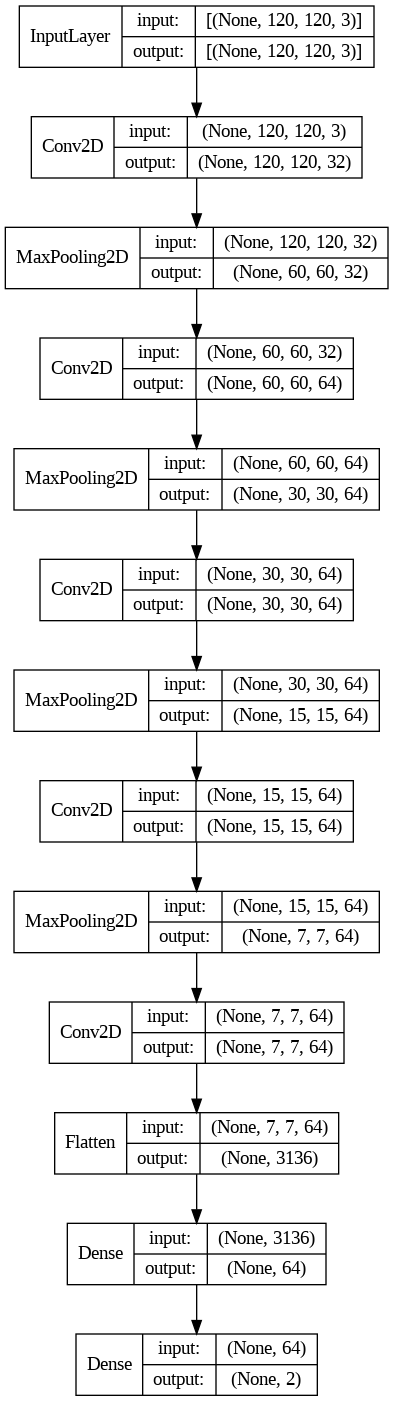

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_image.png', show_layer_names=False, show_shapes=True)

The Adam optimizer is commonly used because it often performs well compared to other optimizers.

Regarding the loss function, since the labels are categorical, categorical cross-entropy is the appropriate choice. It is used as the loss function for multi-class classification models where there are two or more output labels. It measures the performance of a classification model whose output is a probability distribution over multiple classes.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model
The model is trained using the Keras fit() function for 5 epochs. The fit() function returns a history object – the results of this function are recorded in the "history," which is used to plot accuracy and loss functions on the training and validation datasets. This allows for a visual analysis of the model's performance.





In [ ]:
history = model.fit(train_data, validation_data = val_data, batch_size=64, epochs=5)

Epoch 1/5
450/450 [==============================] - 164s 340ms/step - loss: 0.1510 - accuracy: 0.9324 - val_loss: 0.0545 - val_accuracy: 0.9816
Epoch 2/5
450/450 [==============================] - 152s 338ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0209 - val_accuracy: 0.9947
Epoch 3/5
450/450 [==============================] - 146s 323ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0144 - val_accuracy: 0.9959
Epoch 4/5
450/450 [==============================] - 143s 318ms/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.0158 - val_accuracy: 0.9959
Epoch 5/5
450/450 [==============================] - 141s 314ms/step - loss: 0.0193 - accuracy: 0.9950 - val_loss: 0.0167 - val_accuracy: 0.9944


Observing the accuracy on the training dataset and the available losses, it can be said that the model has performed well, as after 1 epoch, the training accuracy is 99%, and the losses are quite low.

Training accuracy: 99.33%
Training loss: 2.27%

#control on the test data

In [ ]:
test_data = test_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False,
    seed=42
)

Found 8000 validated image filenames belonging to 2 classes.


In [ ]:
label_map3 = (test_data.class_indices)
label_map3

{'NEGATIVE': 0, 'POSITIVE': 1}

In [ ]:
(ls, acc) = model.evaluate(test_data)

125/125 [==============================] - 8s 64ms/step - loss: 0.0168 - accuracy: 0.9964


In [ ]:
print('model accuracy = {} %'.format(acc * 100), '. error rate = {} %'.format(ls * 100))

model accuracy = 99.6375024318695 % . error rate = 1.6797874122858047 %


Visualizing the model's performance can be done by plotting graphs of accuracy and loss on both the training and validation datasets.

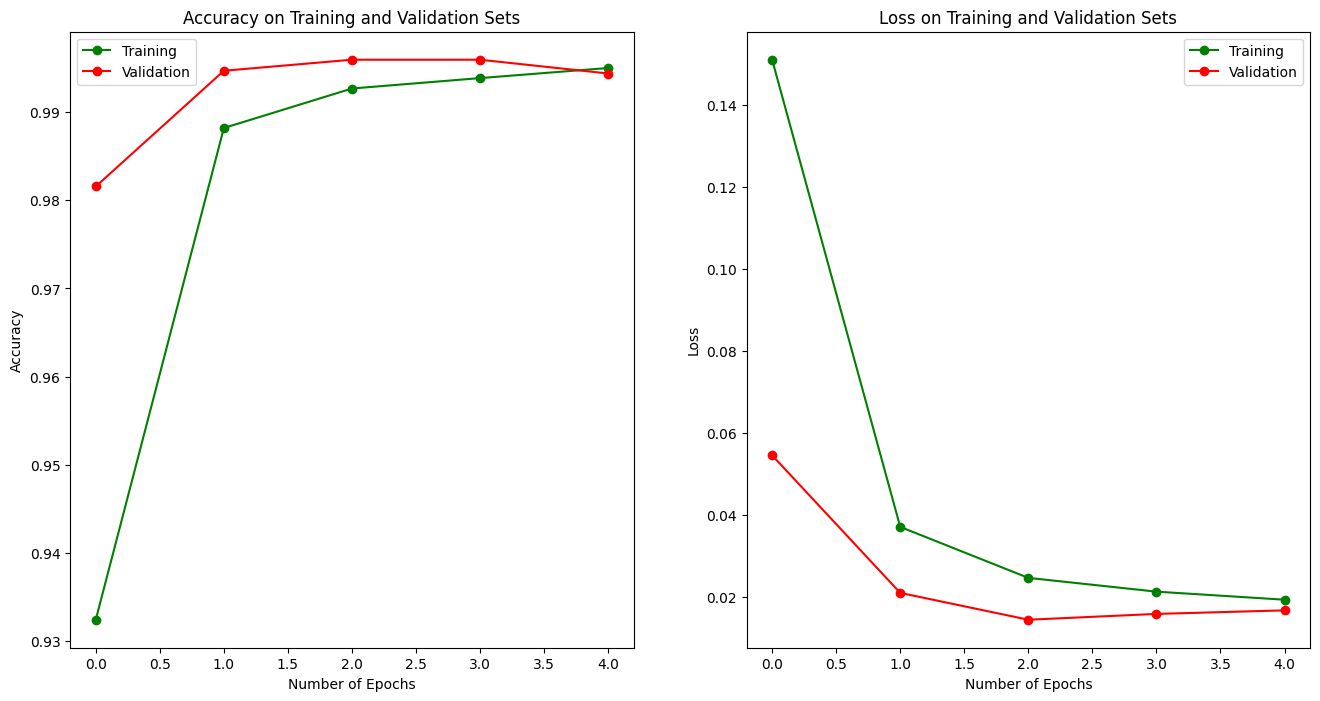

In [ ]:
epochs = [i for i in range(5)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16, 8)

# Plotting accuracy
ax[0].plot(epochs, train_acc, 'go-', label='Training')
ax[0].plot(epochs, val_acc, 'ro-', label='Validation')
ax[0].set_title('Accuracy on Training and Validation Sets')
ax[0].legend()
ax[0].set_xlabel("Number of Epochs")
ax[0].set_ylabel("Accuracy")

# Plotting loss
ax[1].plot(epochs, train_loss, 'g-o', label='Training')
ax[1].plot(epochs, val_loss, 'r-o', label='Validation')
ax[1].set_title('Loss on Training and Validation Sets')
ax[1].legend()
ax[1].set_xlabel("Number of Epochs")
ax[1].set_ylabel("Loss")

plt.show()


In [ ]:
y_pred1 = model.predict(test_data)
y_pred1

125/125 [==============================] - 7s 52ms/step


array([[9.9973315e-01, 2.6687604e-04],
       [4.4710498e-07, 9.9999952e-01],
       [9.9961299e-01, 3.8706526e-04],
       ...,
       [1.3488197e-20, 1.0000000e+00],
       [9.9942541e-01, 5.7462347e-04],
       [9.9885905e-01, 1.1409530e-03]], dtype=float32)

In [ ]:
y_pred1 = model.predict(test_data)
y_pred2 = np.argmax(np.round(y_pred1),axis=1)
y_pred2

125/125 [==============================] - 8s 61ms/step


array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
cm = confusion_matrix(test_data.labels, y_pred2)

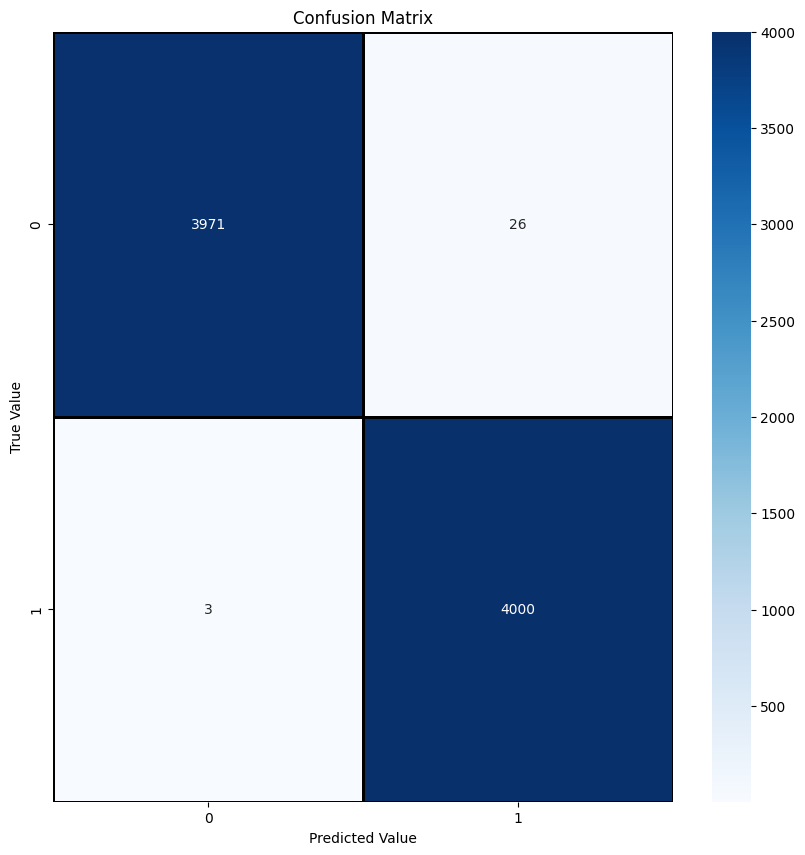

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()


# True Positive (TP) Result:

True Positive represents the correct predictions of positive results from actual positive cases. Out of 4003 actual positive results, 4000 are correctly predicted as positive. Thus, the True Positive value is 4000.

# False Positive (FP) Result:

False Positive represents the incorrect positive predictions. This value represents the number of negative values (out of 3997) falsely predicted as positive. Out of 3997 actual negative results, 16 were falsely predicted as positive. Thus, the False Positive value is 16.

# True Negative (TN) Result:

True Negative represents the correct predictions of negative values from actual negative cases. Out of 3997 actual negative results, 3981 are correctly predicted as negative. Thus, the True Negative value is 3981.

# False Negative (FN) Result:

False Negative represents the incorrect negative predictions. This value represents the number of positive results (out of 4003) falsely predicted as negative. Out of 4003 actual positive results, 3 were falsely predicted as negative. Thus, the False Negative value is 3.

The neural network model performs equally for both classes in terms of Precision, Recall, and F1-Score metrics.

# Precision:

Precision: The precision score evaluates the model's ability to correctly predict positive results from all positive predictions. It is the ratio of the number of positive samples correctly classified to the total number of samples classified as positive (correctly or incorrectly).

Precision Score = TP / (FP + TP)
= 4000 / (16 + 4000)
= 0.996

# Recall:

Recall score evaluates the model's ability to correctly predict positive results from actual positive results. Recall is calculated as the ratio of the number of positive samples correctly classified as positive to the total number of positive samples.

Recall Score = TP / (TP + FN)
= 3981 / (3981 + 3)
= 0.999

# Accuracy:

The accuracy score evaluates the model's ability to correctly predict both positive and negative aspects of all predictions. Mathematically, it is the ratio of the sum of true positive and true negative values to all predictions.

Accuracy Score = (TP + TN) / (TP + FN + TN + FP)
= (4000 + 3981) / (3981 + 16 + 4000 + 3)
= 0.998

# F1-Score:

The F1 score evaluates the model as a function of precision and recall metrics. The F1 score is a way to combine the precision and recall of the model and is defined as the harmonic mean of precision and recall.

F1 Score = 2 * Precision Score * Recall Score / (Precision Score + Recall Score)
= 2 * 0.996 * 0.999 / (0.996 + 0.999)
= 0.997


In [ ]:
clr = classification_report(test_data.labels, y_pred2, target_names=["NEGATIVE", "POSITIVE"])
print(clr)

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.99      1.00      3997
    POSITIVE       0.99      1.00      1.00      4003

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
# Load an image from the input file (size: 120 x 120)
img = keras.preprocessing.image.load_img('Negative/19857.jpg', target_size=(120, 120))

# Convert the image to an array
img_array = keras.preprocessing.image.img_to_array(img)

# Reshape and scale the image
img_array = np.expand_dims(img_array, [0])
img_array = img_array / 255


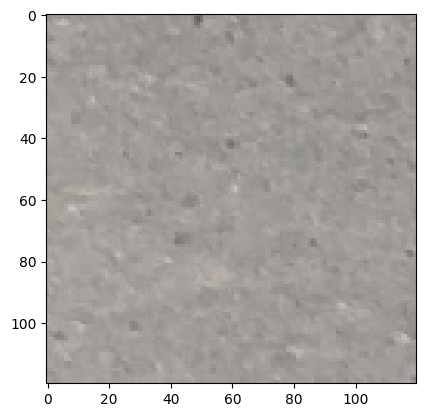

In [ ]:
# show image
plt.imshow(img)

In [ ]:
# shape of the image
print(img_array.shape)

(1, 120, 120, 3)


In [ ]:
# Define a function to determine the probability of a defect in the image
# (assuming an image contains a defect if the model's response with
# the probability of a defect on this image is not less than 50%)
def display_prediction_stats(prob):
  print("Probability of defect: ", prob * 100, "%")
  if prob >= 0.5:
    print("Defects detected!")
  else:
    print("No defects detected!")


In [ ]:
# Check the model's response on this image
prediction = model.predict(img_array)

# Display the result of the check using the function
display_prediction_stats(prediction[0][1])


1/1 [==============================] - 1s 719ms/step
Probability of defect:  0.051149382488802075 %
No defects detected!


In [ ]:
# save model - format - *.h5-файл
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Pros and Cons of the Final CNN Model
Pros:

From a performance perspective, this CNN model is highly efficient compared to other models.

It is straightforward to implement and requires fewer parameters to build.

It can be utilized in various domains, performing fundamental tasks such as face recognition, document analysis, climate prediction, image recognition, and object identification.

Cons:

Overfitting is a common issue during model training, especially when there is insufficient data. This problem can be addressed by augmenting data.

Another common problem is data loss during training. This can be mitigated by increasing the number of epochs and expanding the dataset through augmentation.

If the CNN has multiple layers, the training process can be time-consuming without a modern graphics processing unit (GPU).